In [64]:
#import nessecary libraries
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from skimage import io, filters
import matplotlib.pyplot as plt
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from IPython.display import display
import cv2
from skimage.filters import try_all_threshold
from skimage import data
from skimage.filters import threshold_li
from skimage.feature import canny
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.draw import circle_perimeter
import skimage as ski
from skimage.measure import label, regionprops
from scipy import ndimage as ndi
from skimage.segmentation import watershed
from skimage.feature import peak_local_max




636 568 RGB JPEG <class 'PIL.JpegImagePlugin.JpegImageFile'>


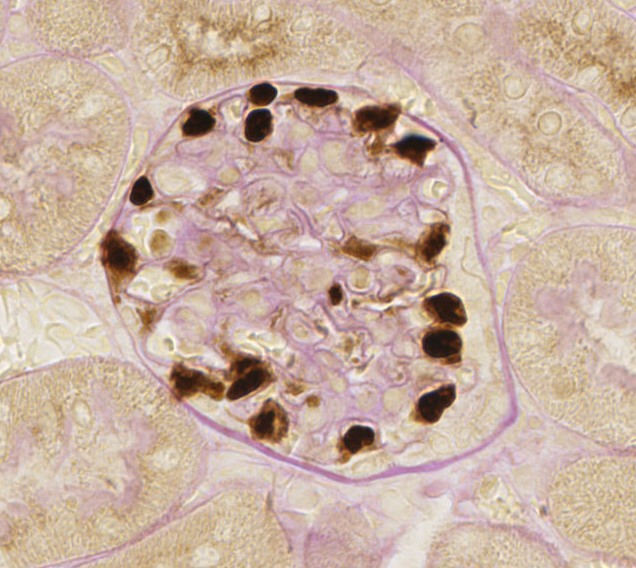

In [65]:
#Read and display the image
im=Image.open("./Images/K6T.jpg") # Read the image
print(im.width, im.height, im.mode, im.format, type(im))
display(im) #display the image  

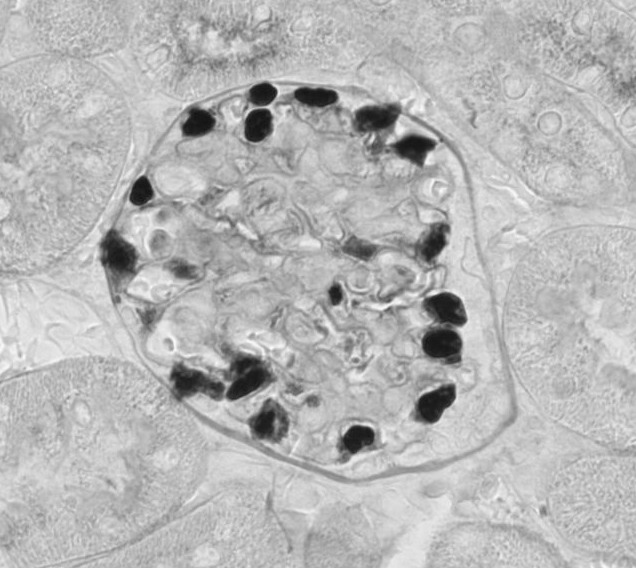

In [66]:
# Produce a gray scale version of the image
im_gray =im.convert('L')  # convert the RGB color to grayscale
im_gray.save("./Images/K6T_gray.png")  # save the image
display(Image.open("./Images/K6T_gray.png"))  # display the gray scale image

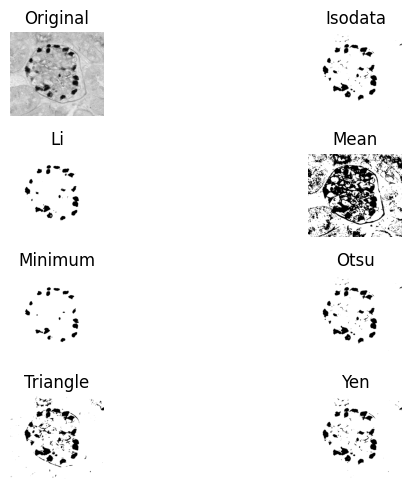

In [67]:
# try all threshholding methods to see which one works better
im_gray = np.array(im_gray)
im_gray= filters.gaussian(im_gray, sigma=1)
fig, ax= try_all_threshold(im_gray, verbose=False)
plt.show()

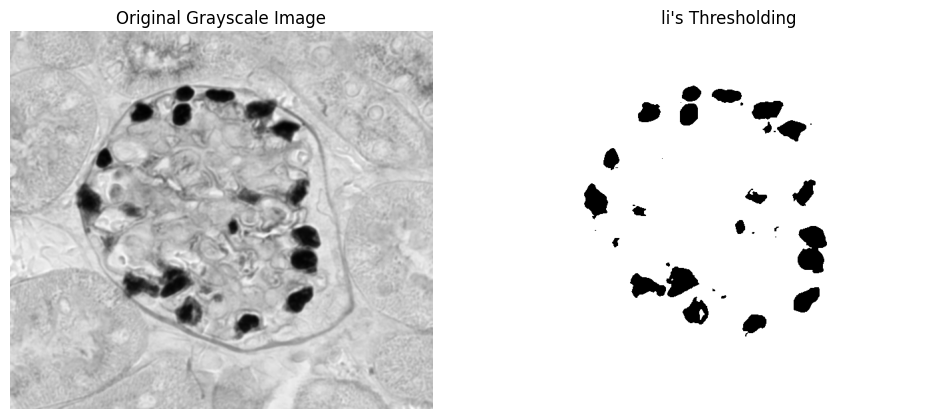

In [68]:
#thresholding with Otsu
# Ensure the image is a NumPy array
im_gray = np.array(im_gray)

# Apply Otsu's thresholding
li_thresh = threshold_li(im_gray)
binary_image = im_gray > li_thresh

# Display the original and thresholded images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(im_gray, cmap='gray')
ax[0].set_title('Original Grayscale Image')
ax[0].axis('off')

ax[1].imshow(binary_image, cmap='gray')
ax[1].set_title("li's Thresholding")
ax[1].axis('off')

plt.show()
io.imsave('./Images/K6T_threshold.png', binary_image.astype(np.uint8) * 255)  # Convert binary image to uint8 format


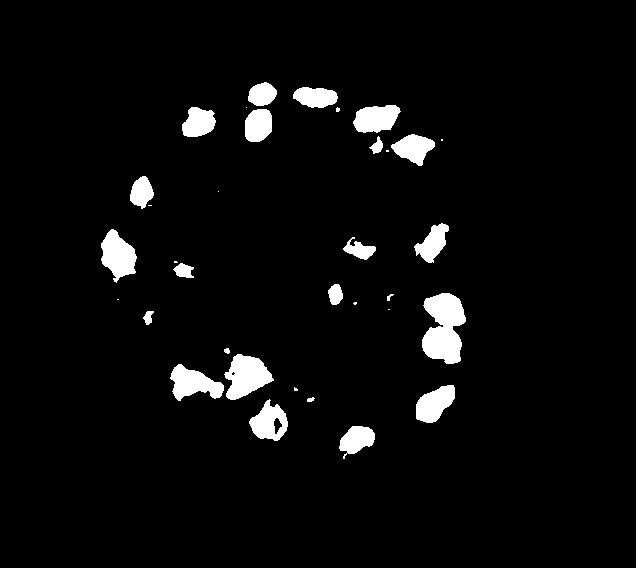

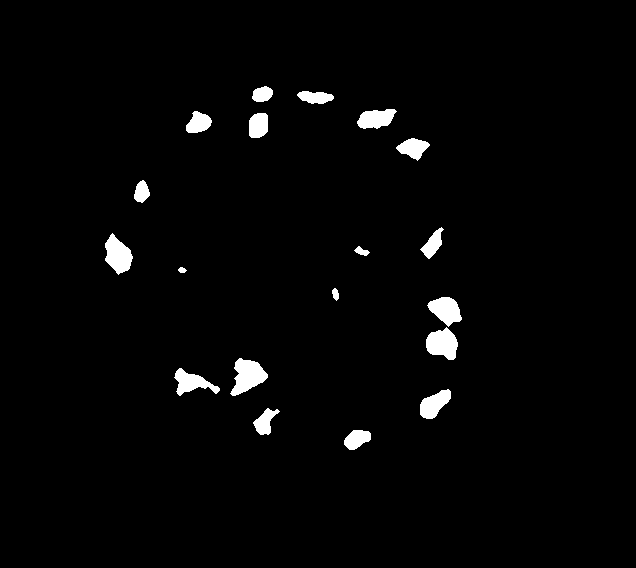

255.0
343.0
566.0
395.0
421.0
447.0
252.0
349.0
728.0
646.0
740.0
843.0
598.0
564.0
369.0
378.0


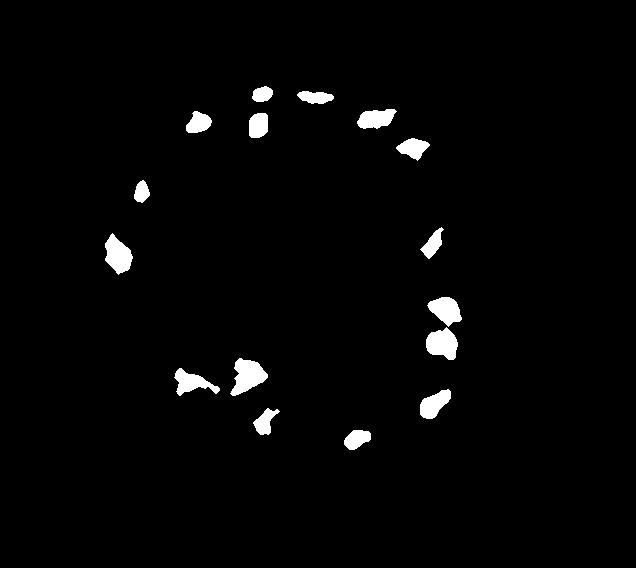

The number of podocytes in this image is: 16


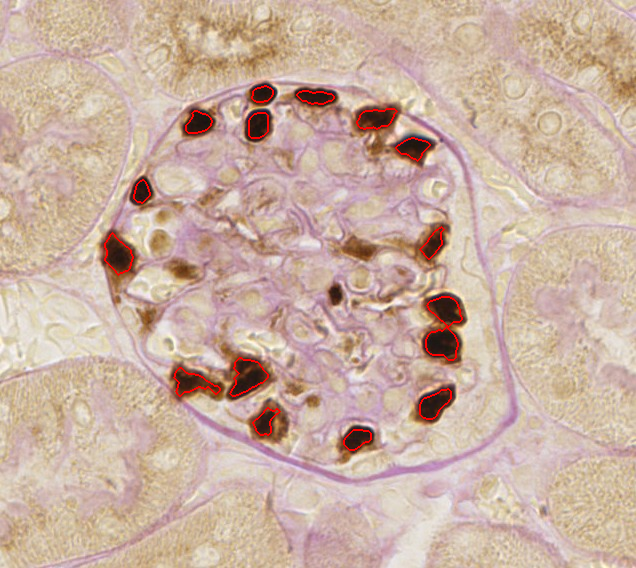

In [70]:
import skimage.morphology as morph

#filter small areas and count the number of podocytes
im_thresh= Image.open("./Images/K6T_threshold.png")   # read the thresholded image
im_thresh= np.array(im_thresh).astype(np.uint8)                  #read it as a numpy array

im_thresh_inv= ski.util.invert(im_thresh)          #invert the image
im_thresh_inv= Image.fromarray(im_thresh_inv)      #get the image from array
display(im_thresh_inv)                               #display the image
im_thresh_inv = np.array(im_thresh_inv).astype(np.uint8)             #convert to array again

selem = morph.disk(5)
eroded = morph.binary_erosion(im_thresh_inv)
i=0
for i in range(5):
    selem = morph.disk(5)
    eroded = morph.binary_erosion(eroded)
    i+=1
    
selem = morph.disk(2)
dilated= morph.binary_dilation(eroded, selem)
display(Image.fromarray(dilated))

label_image = label(dilated)                 # label the regions

for region in regionprops(label_image):                          #label the areas
    if region.area < 100:
        for coordinates in region.coords:
            label_image[coordinates[0], coordinates[1]] = 0
im_thresh_inv_arr = label_image > 0

Podocount = 0
for region in regionprops(label_image):
    Podocount +=1                                  #Count Podocytes
    print(region.area)
cleanIm = Image.fromarray(im_thresh_inv_arr)
cleanIm.save("./Images/K6T_thresh_inv.png")  # save the image

display(cleanIm)
print("The number of podocytes in this image is:", Podocount)


#produce an overlay image
import scipy.ndimage as ndi

#produce an overlay image
import scipy.ndimage as ndi
selem = ski.morphology.disk(1)
regions = np.unique(label_image)
color = [255,0,0]  # red color
#Annotate the original image
for region in regions:
    if region == 0:
        continue   #skip the background
    region_mask = (ndi.minimum_filter(label_image, footprint=selem) == 0) & (ndi.maximum_filter(label_image, footprint=selem) == region)
    im = np.array(im)
    im[region_mask] = color
im_overlay = Image.fromarray(im)
display(im_overlay)

In [25]:
#Notes

# Used erosion and dilation to separate close objects
#Maybe use color deconvolution for the three circles inside
